In [17]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각처리)
# jupyter에서 기본 글꼴이 한글을 지원하지 않아서 필요
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS')

In [18]:
import pandas as pd

kto_total = pd.read_csv("./files/kto_total.csv", index_col=0)
kto_total

,국적,기준년월,관광,공용,상용,유학연수,기타,합계,관광객비율(%)
0,교포,2010-01,0,0,0,0,22537,22537,0.0
1,교포,2010-02,0,0,0,0,21338,21338,0.0
2,교포,2010-03,0,0,0,0,27781,27781,0.0
3,교포,2010-04,0,0,0,0,27697,27697,0.0
4,교포,2010-05,0,0,0,0,27460,27460,0.0
...,...,...,...,...,...,...,...,...,...
34555,튀니지,2020-04,0,0,0,0,16,16,0.0
34556,튀니지,2020-05,0,0,0,0,12,12,0.0
34557,튀니지,2020-06,0,0,1,0,20,21,0.0
34558,튀니지,2020-07,1,0,1,1,19,22,4.5


In [19]:
_datetime = kto_total['기준년월'].str.split("-")
kto_total['년도'] = _datetime.str[0]
kto_total['월'] = _datetime.str[1]
kto_total.head()

,국적,기준년월,관광,공용,상용,유학연수,기타,합계,관광객비율(%),년도,월
0,교포,2010-01,0,0,0,0,22537,22537,0.0,2010,01
1,교포,2010-02,0,0,0,0,21338,21338,0.0,2010,02
2,교포,2010-03,0,0,0,0,27781,27781,0.0,2010,03
3,교포,2010-04,0,0,0,0,27697,27697,0.0,2010,04
4,교포,2010-05,0,0,0,0,27460,27460,0.0,2010,05


In [21]:
condition = (kto_total['국적'] == '중국')
kto_total_filter = kto_total[condition]
kto_total_filter.head(12)

,국적,기준년월,관광,공용,상용,유학연수,기타,합계,관광객비율(%),년도,월
24704,중국,2010-01,40425,55,11930,2751,36091,91252,44.3,2010,01
24705,중국,2010-02,60590,68,7907,29546,42460,140571,43.1,2010,02
24706,중국,2010-03,50330,174,13549,14924,62480,141457,35.6,2010,03
24707,중국,2010-04,84252,212,13306,2199,47711,147680,57.1,2010,04
24708,중국,2010-05,89056,360,12325,2931,49394,154066,57.8,2010,05
24709,중국,2010-06,87080,293,12375,3293,47078,150119,58.0,2010,06
24710,중국,2010-07,122432,239,10608,4309,57600,195188,62.7,2010,07
24711,중국,2010-08,142180,232,11049,26427,62099,241987,58.8,2010,08
24712,중국,2010-09,93545,293,10013,11374,60971,176196,53.1,2010,09
24713,중국,2010-10,107237,374,11371,3102,59344,181428,59.1,2010,10


In [22]:
kto_total_pivot = kto_total_filter.pivot_table(values='관광',
                                              index='년도',
                                              columns='월')
kto_total_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


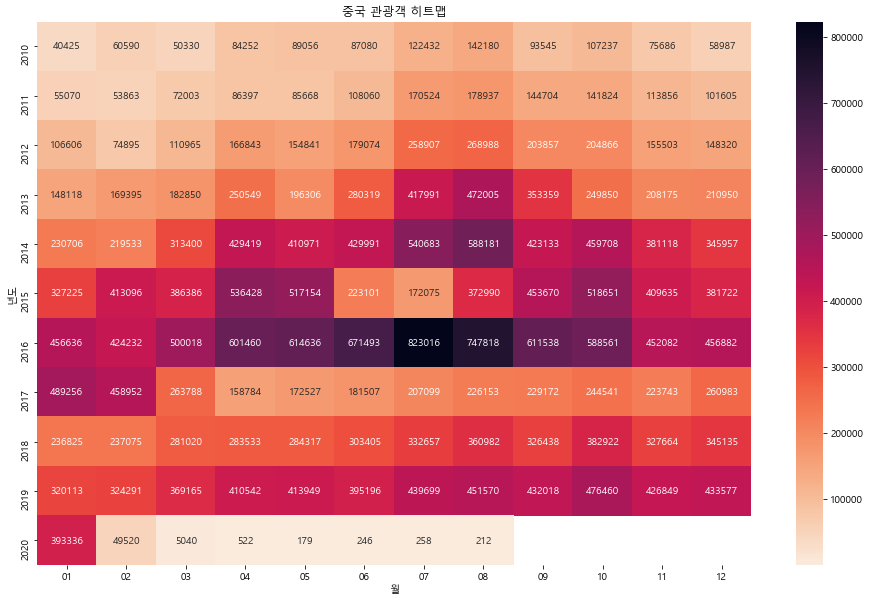

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 10))

# annot : 히트맵 그래프에 실제값 표시
# fmt : 숫자 형태 표현법 지정
# cap : 그래프 색 조합 지정
sns.heatmap(kto_total_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

plt.title('중국 관광객 히트맵')

plt.show()